# Introduction

Here we save the list of cell barcodes for the donor deconvolution with vireo and cell-snp-lite. 
The results of the donor deconvolution are generated with the scripts in .../03_donor_deconvolution/scripts.

After saving the barcodes a few plots are generated in this notebook to investigate the results.

As the erythroid cells are falsely identified as one donor (since they only express 4 genes) we filtered them out and
rerun the analysis. (i.e. the sections without erythroid cells are the final ones)


In [1]:
DATA_DIR = '/storage/groups/ml01/workspace/louis.kuemmerle/projects/A1/data2/' # "./../"
DATA_VERSION = 'april21'
RESULTS_DIR = '/storage/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/'
SHAM = True

########################################################################################
sham_str = '_wSham' if SHAM else ''

In [2]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [3]:
samples = [
    'MUC12819',
    'MUC12820',
    'MUC12821',
    'MUC12822',
    'MUC12823',
    'MUC12824',
    'MUC12825',
    'MUC12826',
    'MUC12827',
    'MUC12828',
    'MUC12829',
    'MUC12830',
    'MUC12831',
    'MUC12832',
    'MUC12833',
    'MUC12834',
    'MUC12835',
    'MUC12836',
    'MUC12837',
    'MUC12838',
    'MUC12839',
    'MUC12840',
    'MUC12841',
    'MUC12842',
    'MUC12843',
    'MUC12844',
    'MUC12845',
    'MUC12846',
    'MUC12847',
    'MUC12848',
    'MUC12849',
    'MUC12850'
]

# Save lists of barcodes

In [3]:
adata = sc.read(DATA_DIR+f'cellxgene_{DATA_VERSION}{sham_str}_umaps.h5ad')

In [12]:
barcodes_dir = "/storage/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/donor_deconv/barcodes/"

In [20]:
for i, sample in enumerate(samples):
    obs = adata[adata.obs_names.to_series().apply(lambda x: x.split("-")[-1]) == str(i)].obs_names
    with open(barcodes_dir+sample+".txt","w") as file:
        for s in obs:
            file.write(s.rsplit("-",1)[0]+"\n")

Take all barcodes also the ones before QC

In [41]:
adata_no_QC = sc.read(DATA_DIR+f'data_merged_{DATA_VERSION}_wSham.h5ad')

In [42]:
barcodes_dir = "/storage/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/donor_deconv/barcodes/"

In [45]:
for i, sample in enumerate(samples):
    obs = adata_no_QC[adata_no_QC.obs_names.to_series().apply(lambda x: x.split("-")[-1]) == str(i)].obs_names
    with open(barcodes_dir+sample+"_no_QC.txt","w") as file:
        for s in obs:
            file.write(s.rsplit("-",1)[0]+"\n")

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


# Save lists of barcodes no erythroid cells

In [8]:
adata = sc.read(DATA_DIR+f'cellxgene_{DATA_VERSION}{sham_str}_umaps.h5ad')
adata = adata[~adata.obs["level1"].isin(["erythroid precursor", "erythroid cell"])]

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [10]:
barcodes_dir = "/storage/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/donor_deconv/barcodes_noeryt/"

In [11]:
for i, sample in enumerate(samples):
    obs = adata[adata.obs_names.to_series().apply(lambda x: x.split("-")[-1]) == str(i)].obs_names
    with open(barcodes_dir+sample+".txt","w") as file:
        for s in obs:
            file.write(s.rsplit("-",1)[0]+"\n")

Take all barcodes also the ones before QC (doesn't apply here since we don't know the cell types of cells that didn't pass QC)

# Plot vireo results

In [5]:
adata = sc.read(DATA_DIR+f'cellxgene_{DATA_VERSION}{sham_str}_umaps.h5ad')

###          MUC12820          ###


unassigned    2198
donor1        1749
donor0        1414
donor2         892
doublet         77
Name: donor, dtype: int64

donor                donor0  donor1  donor2  doublet  unassigned
level1                                                          
progenitors              47     137       6       24          59
neutrophil              916     930     139       21         945
monocyte                132     193      23        8         162
B cell                  207     296      49        1         324
T cell                   34      57       3        0          36
NK cell                   9      16       0        1          18
NK-T cell                13      20       3        0          13
dendritic cell           11      26       3        0          16
erythroid precursor      22      43     338       22          85
erythroid cell           18      19     326        0         529
basophil                  4      12       2        0           9
structural cell           1       0       0        0           2

... storing 'donor' as categorical


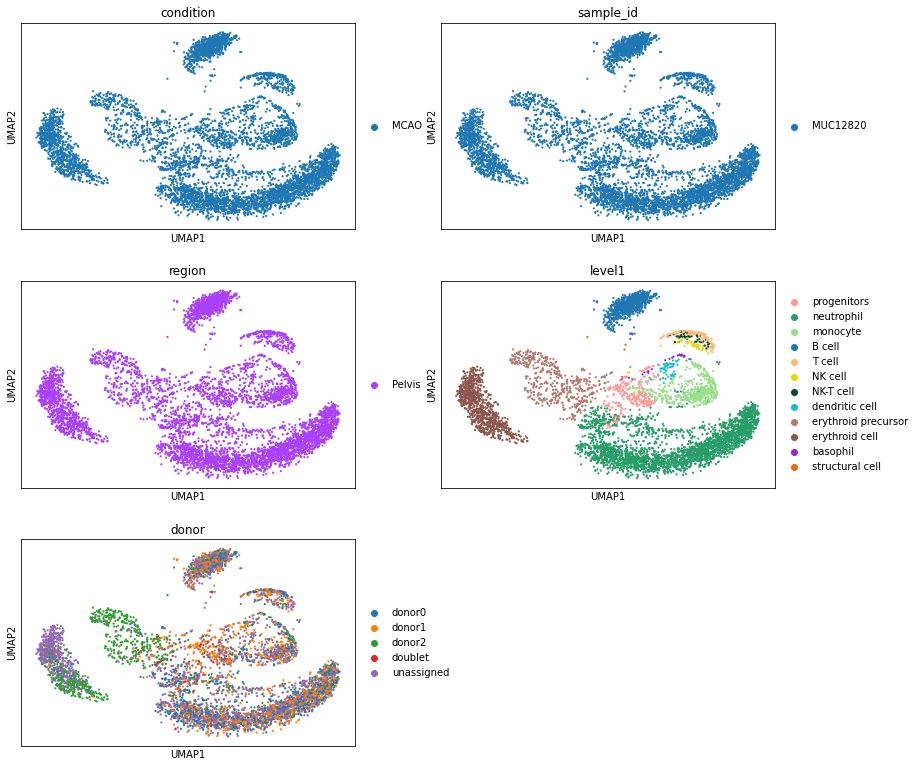

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12822          ###


donor2        143
unassigned    128
donor1         81
donor0         79
doublet        23
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors                0       0       0        0          17
neutrophil                 2       0       0        1          13
monocyte                   0       0       0        1           2
T cell                     0       0       2        1           2
NK-T cell                  0       1       1        0           0
dendritic cell             1       6       0        1           2
macrophage                 6      20      12        4          17
microglia                  0       4       0        0           4
erythroid precursor        2       0       0        0          17
erythroid cell            30       9       0        0           3
structural cell           36      41     128       14          49
brain cell                 2       0       0        0           2
innate lymphoid cell       0       0       0        1           0

... storing 'donor' as categorical


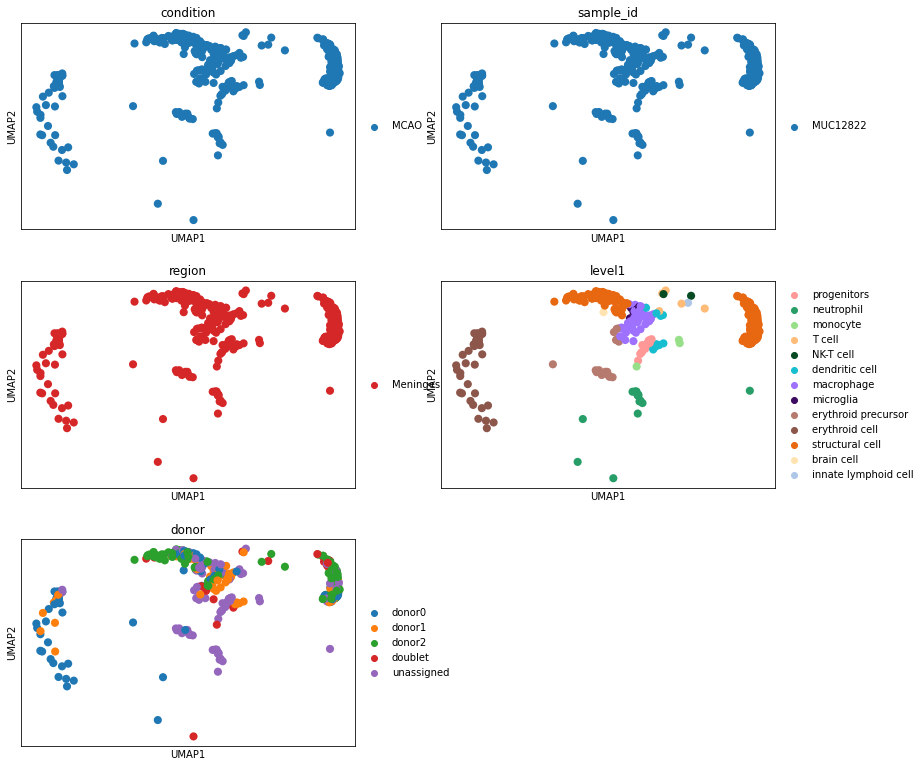

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12823          ###


donor0        3519
unassigned    2135
donor1        1272
donor2         647
doublet        413
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors              239      10      20       43          23
neutrophil              1999     331     289      217         989
monocyte                 440      29      56       66         120
B cell                   491     128     101       12         293
T cell                    87      21       8        5          41
NK cell                   31       6       8        3          25
NK-T cell                 28      10       1        3          14
dendritic cell            42       6       3       11          16
macrophage                 1       0       0        0           2
erythroid precursor       50     308      91       51          74
erythroid cell            76     418      69        0         526
basophil                  26       3       0        1           9
structural cell            6       2       1        0           3
megakaryocyte              1       0       0        0           0
innate lymphoid cell       2       0       0        1           0

... storing 'donor' as categorical


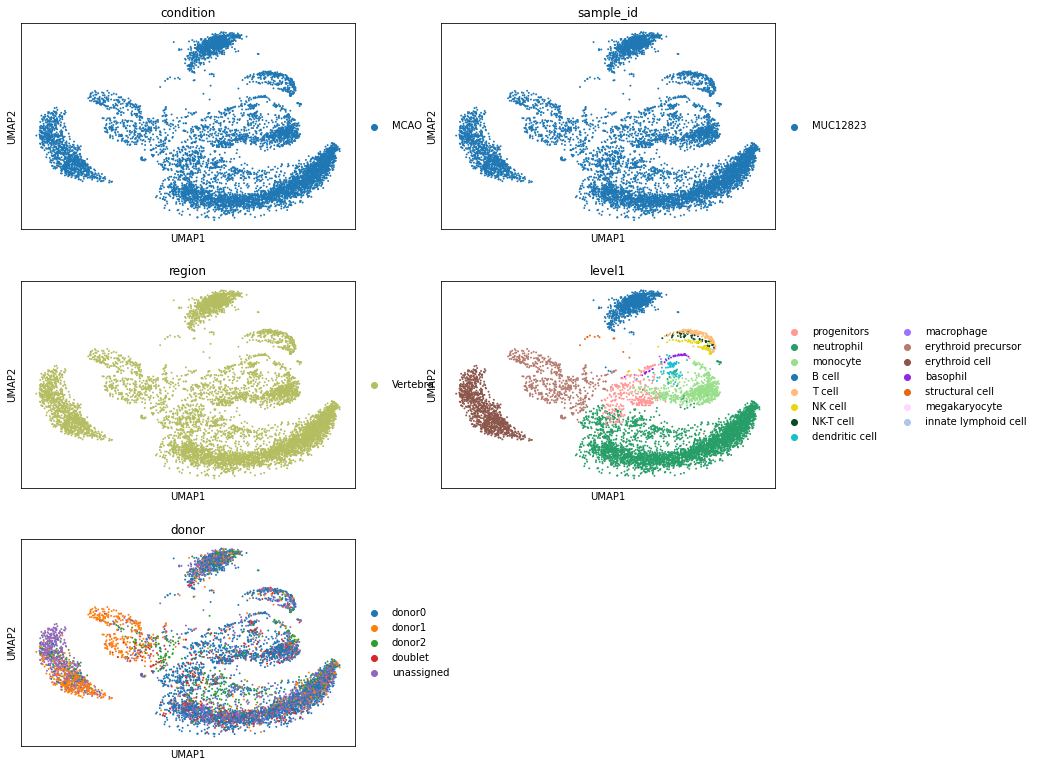

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12824          ###


unassigned    1875
donor1        1830
donor2        1476
donor0        1190
doublet        102
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors                4      94     118       41          59
neutrophil                84    1311     659       16         751
monocyte                   9     121     188       12         141
B cell                    44     210     284        4         287
T cell                     4      21      70        0          22
NK cell                    1       9      17        0           8
NK-T cell                  2      12      24        0          13
dendritic cell             0      17      29        2          16
macrophage                 1       0       1        0           2
microglia                  0       0       0        0           1
erythroid precursor      553      20      52       26          79
erythroid cell           487      10       5        0         476
basophil                   0       5      22        0          11
structural cell            1       0       5        1           7
megakaryocyte              0       0       1        0           1
innate lymphoid cell       0       0       1        0           1

... storing 'donor' as categorical


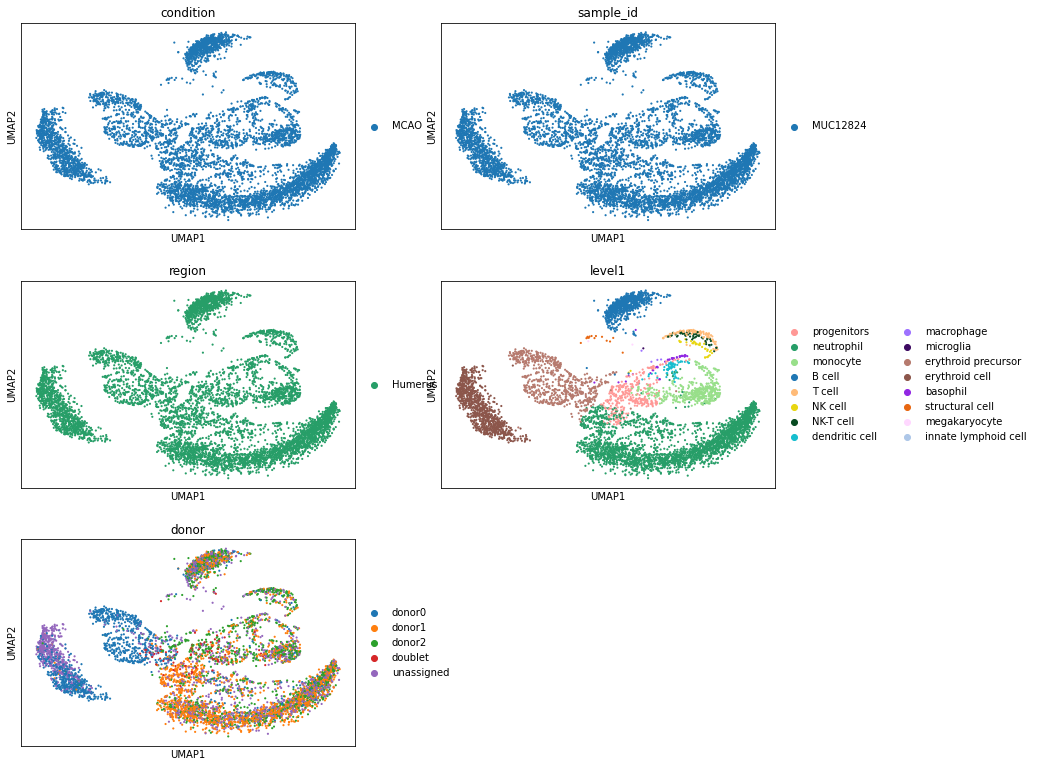

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12825          ###


donor0        2316
unassigned    1066
donor2         788
donor1         675
doublet        116
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors              137       8       1       15           7
neutrophil              1274     290      76       42         406
monocyte                 253      51       5       31          69
B cell                   365     202      56        4         193
T cell                    60      25       4        2          24
NK cell                   36      13       6        0          12
NK-T cell                 24       8       0        2           9
dendritic cell            44      15       0        5          16
macrophage                 4       1       1        0           3
microglia                  1       0       0        0           0
erythroid precursor       34      19     287       14          30
erythroid cell            51      39     351        0         267
basophil                  15       4       0        1           2
structural cell           16       0       1        0          28
megakaryocyte              1       0       0        0           0
innate lymphoid cell       1       0       0        0           0

... storing 'donor' as categorical


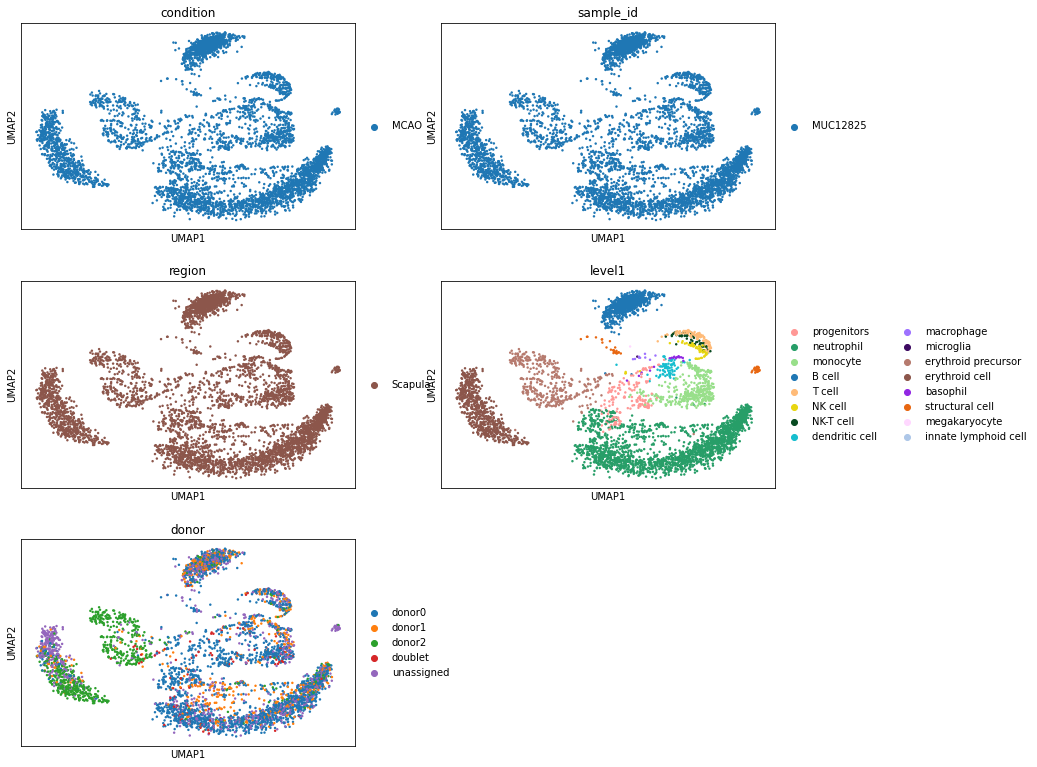

###          MUC12826          ###


/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


unassigned    473
donor2        236
donor0        158
donor1        151
doublet        64
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors                0       0       0        1           2
neutrophil                 2       5       2        0           5
monocyte                   0       2       3        1           1
B cell                     0       1       0        0           3
T cell                     0       1       0        0           2
dendritic cell             1       0       0        1           3
macrophage                 3       7       2        5          14
microglia                 34      52      65       13         131
erythroid precursor        0       0       1        0           5
erythroid cell             3       2       4        0           5
structural cell            3       2       8        3          23
brain cell               112      79     151       40         277
megakaryocyte              0       0       0        0           1
innate lymphoid cell       0       0       0        0           1

... storing 'donor' as categorical


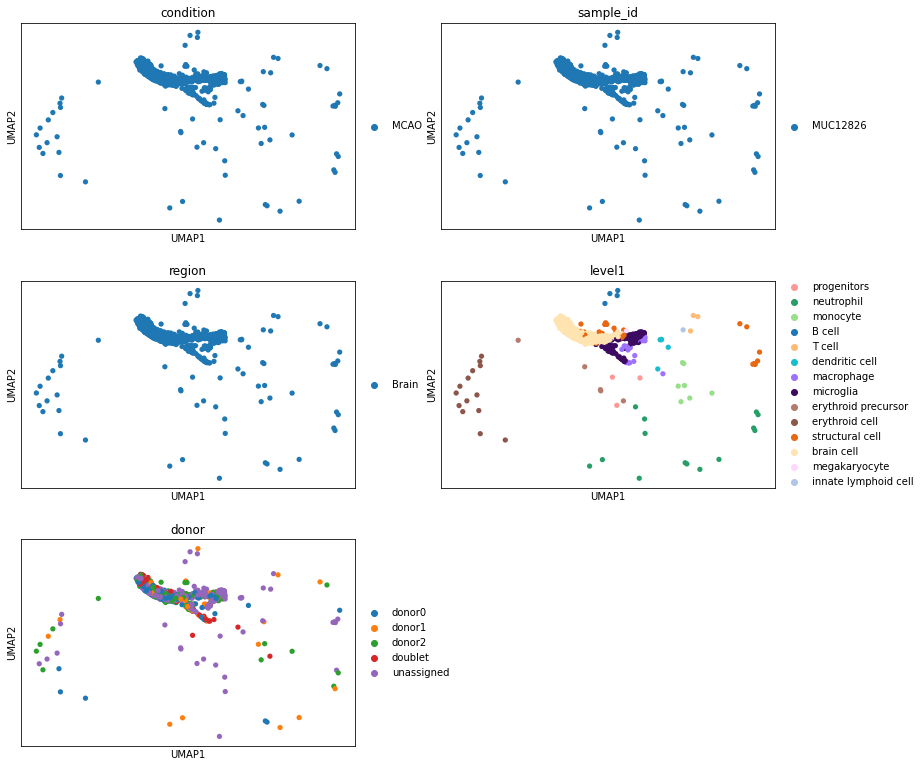

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12827          ###


donor2        1303
unassigned    1293
donor1         973
donor0         760
doublet         88
Name: donor, dtype: int64

donor                donor0  donor1  donor2  doublet  unassigned
level1                                                          
progenitors               9       6      40       15           5
neutrophil              107     374     680       30         301
monocyte                  7      34      79       10          33
B cell                   45     328     312        3         150
T cell                    8      75      70        7          33
NK cell                   2      20      23        0          14
NK-T cell                 0      10      11        0           7
dendritic cell            4       8      26        4          13
macrophage                0       0       0        0           2
erythroid precursor     133      23      24       17          40
erythroid cell          444      89      33        0         688
basophil                  0       3       4        2           2
structural cell           0       3       1        0           5
megakaryocyte             1       0       0        0           0

... storing 'donor' as categorical


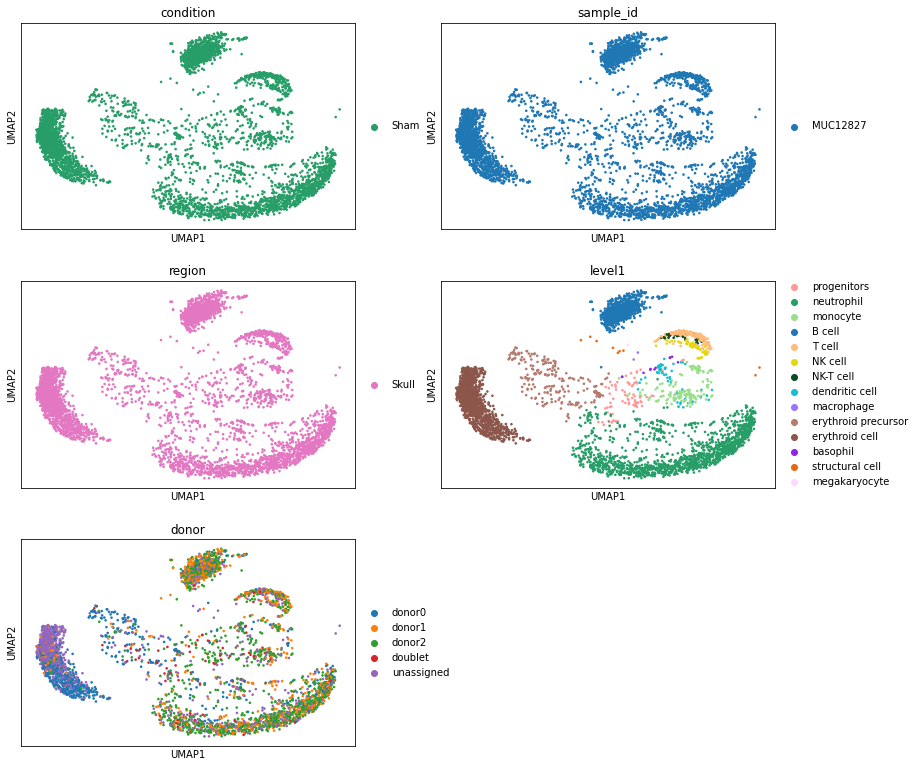

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12828          ###


unassigned    1918
donor0        1868
donor2        1546
donor1         609
doublet        221
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors              119      14      43       68          35
neutrophil              1022     197     364       77         538
monocyte                 129      29      81       24          91
B cell                   308      62     224        6         161
T cell                    54      11      37        3          37
NK cell                   18       4      12        1           8
NK-T cell                 14       4       5        1           7
dendritic cell            50      11      17       10          35
macrophage                 1       0       0        1           8
microglia                  0       0       0        0           1
erythroid precursor       83     140     353       27         133
erythroid cell            53     133     391        0         837
basophil                  10       3      15        3           6
structural cell            5       1       3        0          20
brain cell                 1       0       0        0           1
innate lymphoid cell       1       0       1        0           0

... storing 'donor' as categorical


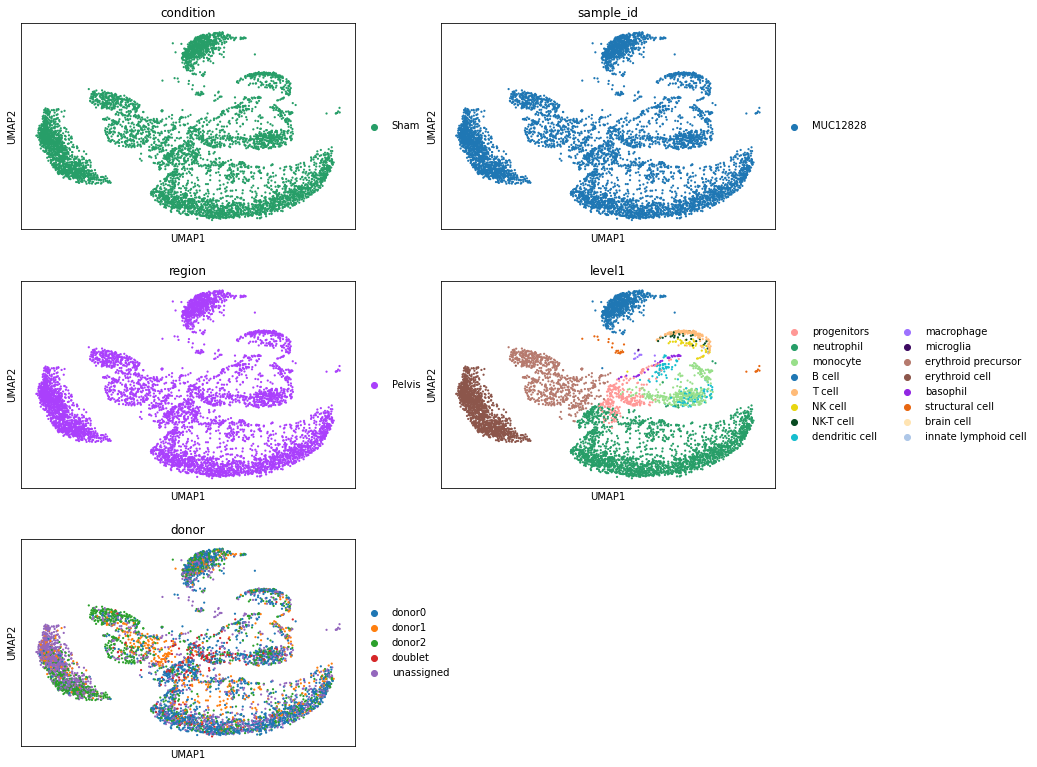

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12829          ###


donor0        2470
unassigned    1757
donor2        1122
donor1         581
doublet        117
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors              232      13       4       28          15
neutrophil              1316     226     113       36         505
monocyte                 194      28      12       12          51
B cell                   342      55      52        1         128
T cell                    78       4      12        0          26
NK cell                   26       1       2        1           7
NK-T cell                 20       1       3        1          14
dendritic cell            81       5       4        6           8
macrophage                 1       1       1        0           2
erythroid precursor      112     109     459       30         147
erythroid cell            40     137     456        0         839
basophil                  14       1       4        2           4
structural cell           13       0       0        0          10
innate lymphoid cell       1       0       0        0           1

... storing 'donor' as categorical


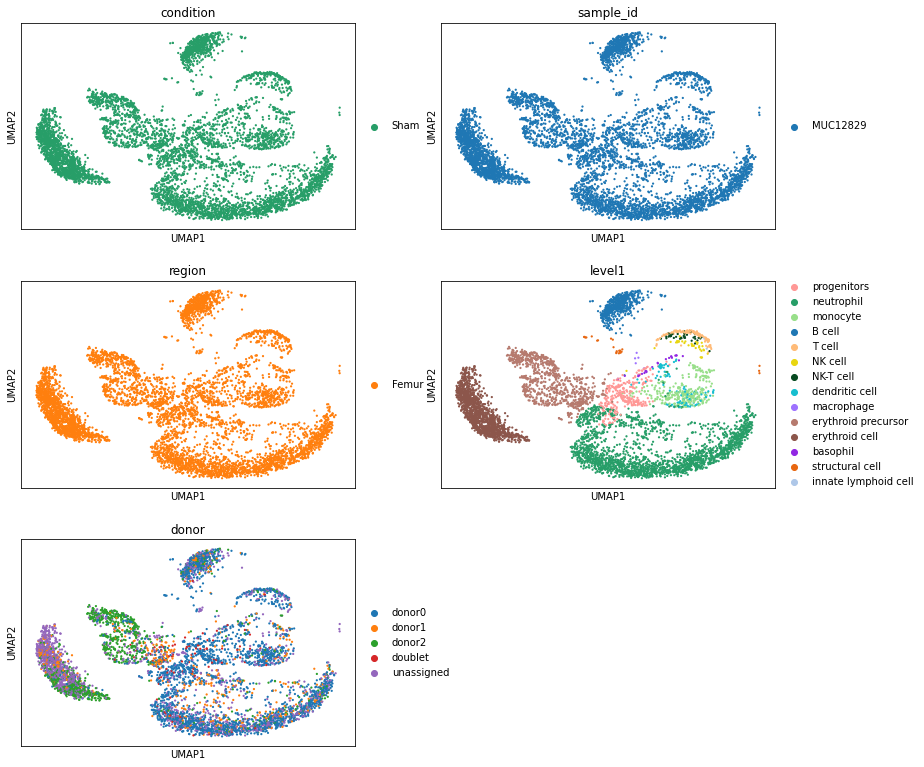

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12830          ###


unassigned    367
donor2        306
donor1        284
donor0        242
doublet        47
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors                0       0       0        3          29
neutrophil                10      14       2        1          21
monocyte                   2       2       0        0           1
B cell                     3       6       0        1           1
T cell                     1       4       3        2           4
NK-T cell                  0       5       2        1           1
dendritic cell             4      11       3        4           7
macrophage                52      60      38       12          55
microglia                  1       3       0        0           6
erythroid precursor        2       1       5        0          37
erythroid cell             3       7      49        0          34
structural cell          164     164     203       23         160
brain cell                 0       3       1        0           7
innate lymphoid cell       0       4       0        0           4

... storing 'donor' as categorical


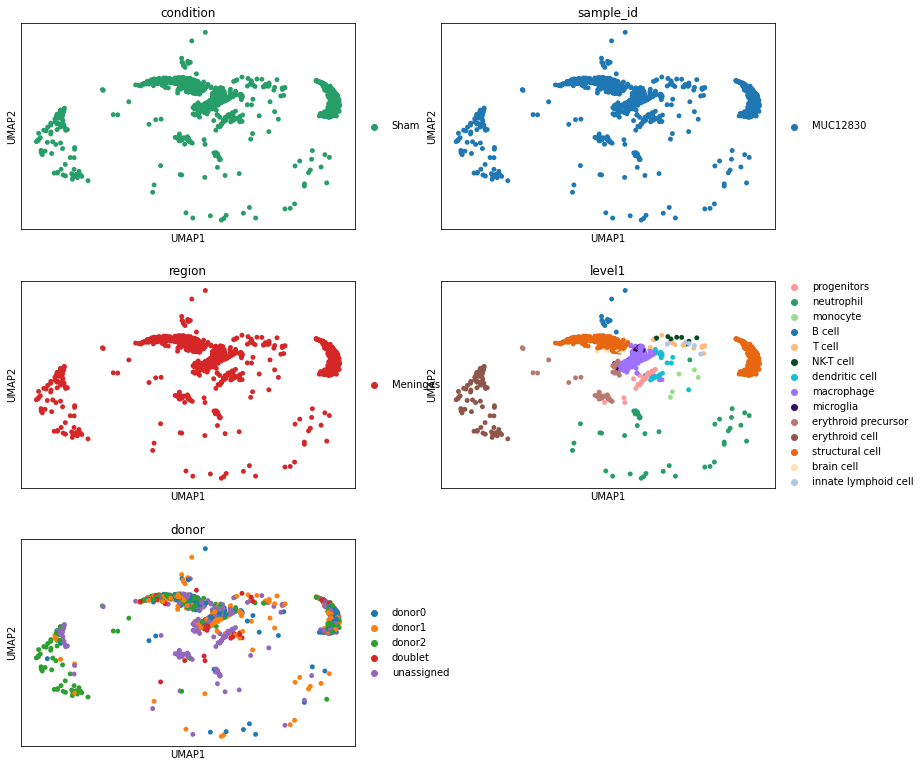

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
for i,sample in enumerate(samples):
    try:
        a = adata[adata.obs["sample_id"]==sample].copy()
        df = pd.read_csv(f"/storage/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/donor_deconv/vireo/{sample}/donor_ids.tsv", sep='\t')
        df.index = [idx+f"-{i}" for idx in df["cell"].values]
        a.obs["donor"] = df["donor_id"]
        print(f"###          {sample}          ###")
        display(a.obs["donor"].value_counts())
        display(pd.crosstab(a.obs["level1"],a.obs["donor"]))
        sc.pl.umap(a,color=["condition","sample_id","region","level1","donor"],ncols=2)
    except:
        pass

### No erythroid cells

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12819          ###


donor1        1417
donor0        1390
donor2        1208
unassigned    1109
doublet         71
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors               50      54      13       23          46
neutrophil               829     814     734       17         646
monocyte                  95     125      54       14         100
B cell                   300     302     300        4         233
T cell                    51      49      54        2          47
NK cell                   25      41      22        0          15
NK-T cell                 11      13      11        1           8
dendritic cell            16      12      14        9           6
macrophage                 0       0       0        1           0
basophil                   8       5       5        0           4
structural cell            3       1       0        0           4
innate lymphoid cell       2       1       1        0           0

... storing 'donor' as categorical


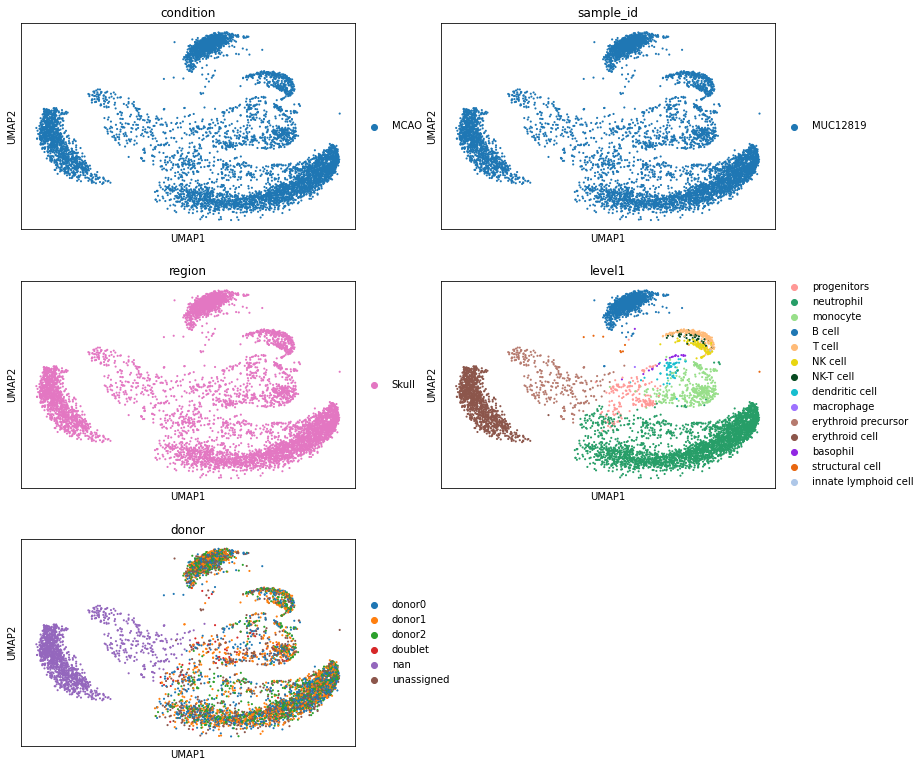

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12820          ###


donor0        1431
donor2        1296
donor1        1091
unassigned    1034
doublet         76
Name: donor, dtype: int64

donor            donor0  donor1  donor2  doublet  unassigned
level1                                                      
progenitors          24      22     132       40          55
neutrophil          924     761     606       13         647
monocyte            117      76     181       20         124
B cell              284     183     258        1         151
T cell               42      27      40        0          21
NK cell              19       4      14        2           5
NK-T cell             5       9      27        0           8
dendritic cell       11       7      20        0          18
basophil              4       2      18        0           3
structural cell       1       0       0        0           2

... storing 'donor' as categorical


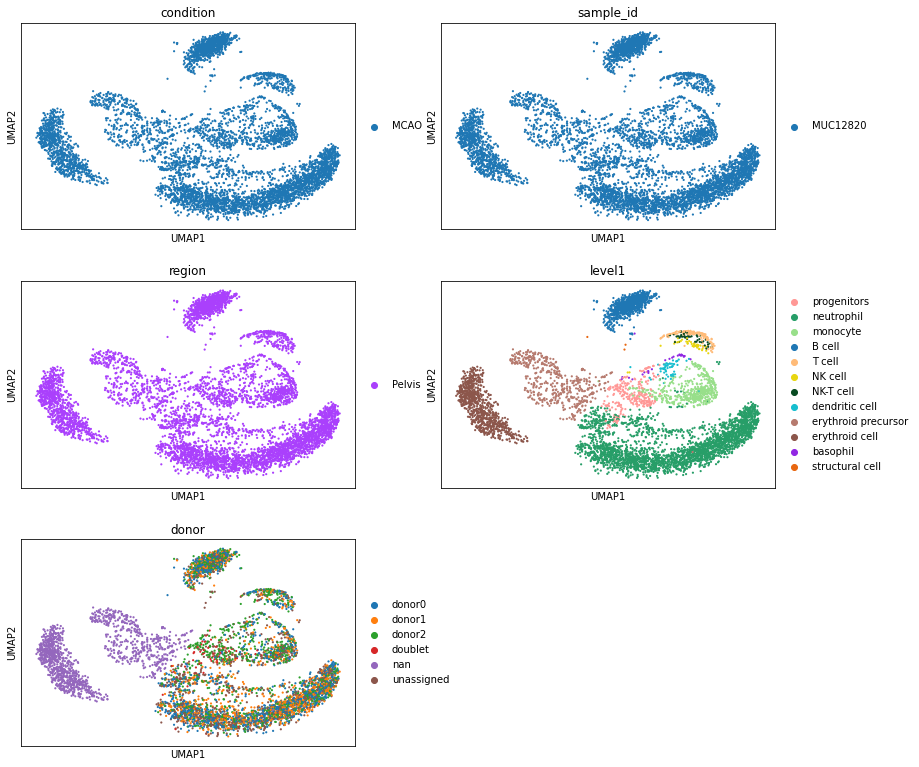

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12821          ###


donor1        1846
donor2        1536
unassigned    1461
donor0        1174
doublet         93
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors               38     187      61       56          83
neutrophil               722     924     980       23         882
monocyte                 113     178     141       12         171
B cell                   209     395     244        1         219
T cell                    39      61      45        0          34
NK cell                   12      19      14        0          14
NK-T cell                 18      24      18        0          20
dendritic cell            15      41      19        1          26
macrophage                 0       0       2        0           1
basophil                   7      14       8        0           6
structural cell            1       3       3        0           3
megakaryocyte              0       0       0        0           1
innate lymphoid cell       0       0       1        0           1

... storing 'donor' as categorical


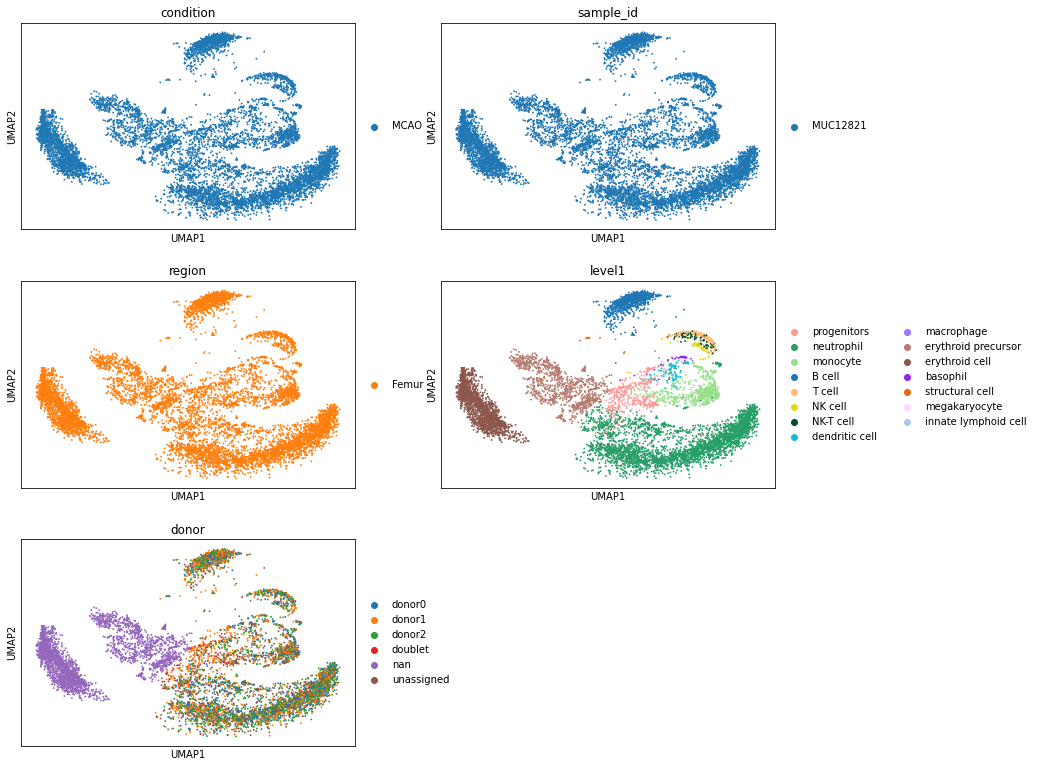

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12822          ###


donor2        136
unassigned    107
donor0         67
donor1         63
doublet        20
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors                0       1       0        0          16
neutrophil                 1       2       0        1          12
monocyte                   0       1       0        0           2
T cell                     1       0       1        0           3
NK-T cell                  0       1       0        1           0
dendritic cell             6       0       2        1           1
macrophage                20       2      20        3          14
microglia                  1       1       2        0           4
structural cell           37      55     111       14          51
brain cell                 1       0       0        0           3
innate lymphoid cell       0       0       0        0           1

... storing 'donor' as categorical


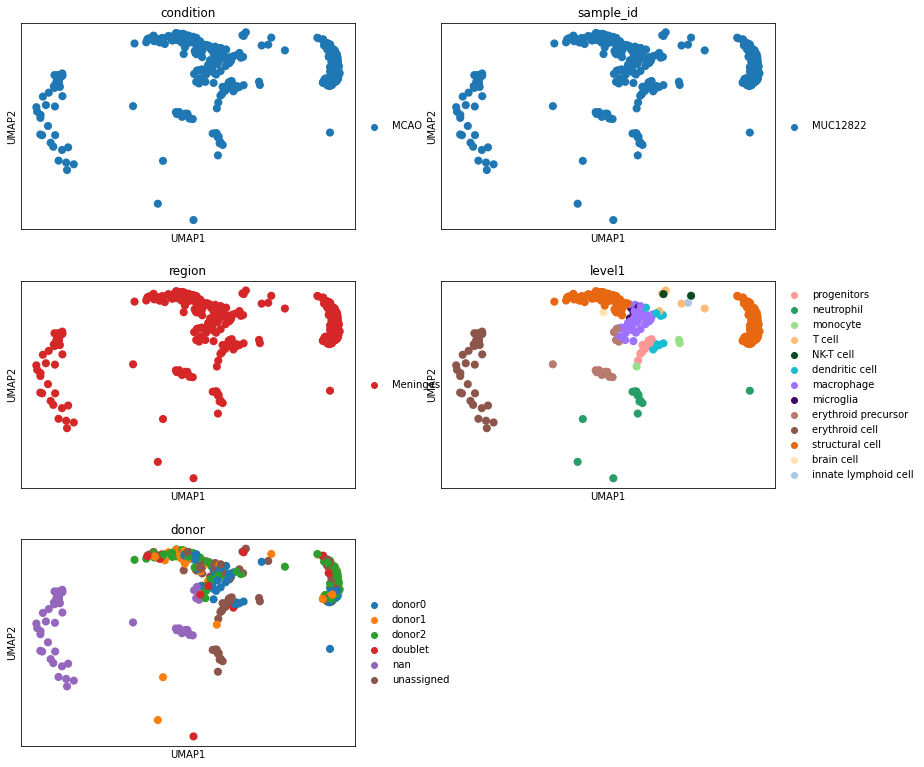

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12823          ###


donor2        2443
unassigned    1574
donor0        1110
donor1         998
doublet        198
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors               28      28     173       54          52
neutrophil               639     618    1421       86        1061
monocyte                 119      70     283       47         192
B cell                   248     207     390        3         177
T cell                    31      26      64        2          39
NK cell                   11      26      26        0          10
NK-T cell                 10       9      23        0          14
dendritic cell             9      10      39        3          17
macrophage                 0       0       1        1           1
basophil                   7       0      21        2           9
structural cell            5       4       1        0           2
megakaryocyte              1       0       0        0           0
innate lymphoid cell       2       0       1        0           0

... storing 'donor' as categorical


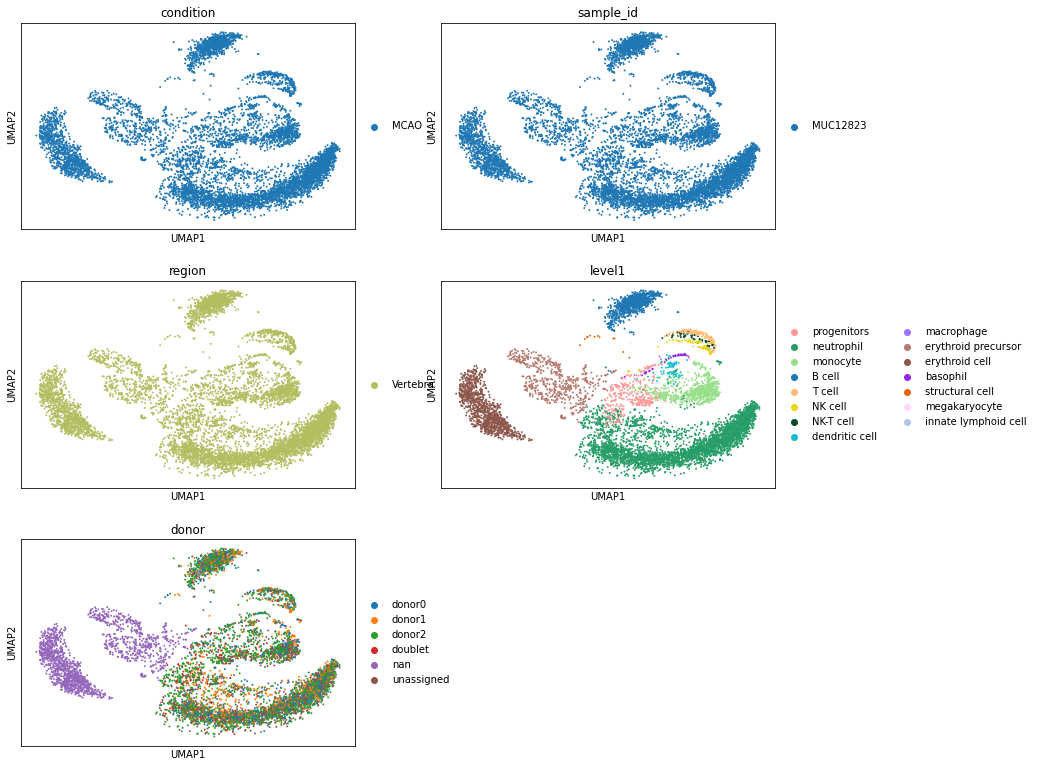

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12824          ###


donor2        1244
donor1        1238
unassigned    1121
donor0        1085
doublet         77
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors               43     115      34       39          85
neutrophil               583     553     999       19         667
monocyte                 137     142      50       17         125
B cell                   223     297     124        1         184
T cell                    31      52      14        0          20
NK cell                    9      14       7        0           5
NK-T cell                 16      25       5        0           5
dendritic cell            24      20       6        0          14
macrophage                 2       1       0        0           1
microglia                  0       0       0        0           1
basophil                  14      10       4        1           9
structural cell            2       8       0        0           4
megakaryocyte              0       1       0        0           1
innate lymphoid cell       1       0       1        0           0

... storing 'donor' as categorical


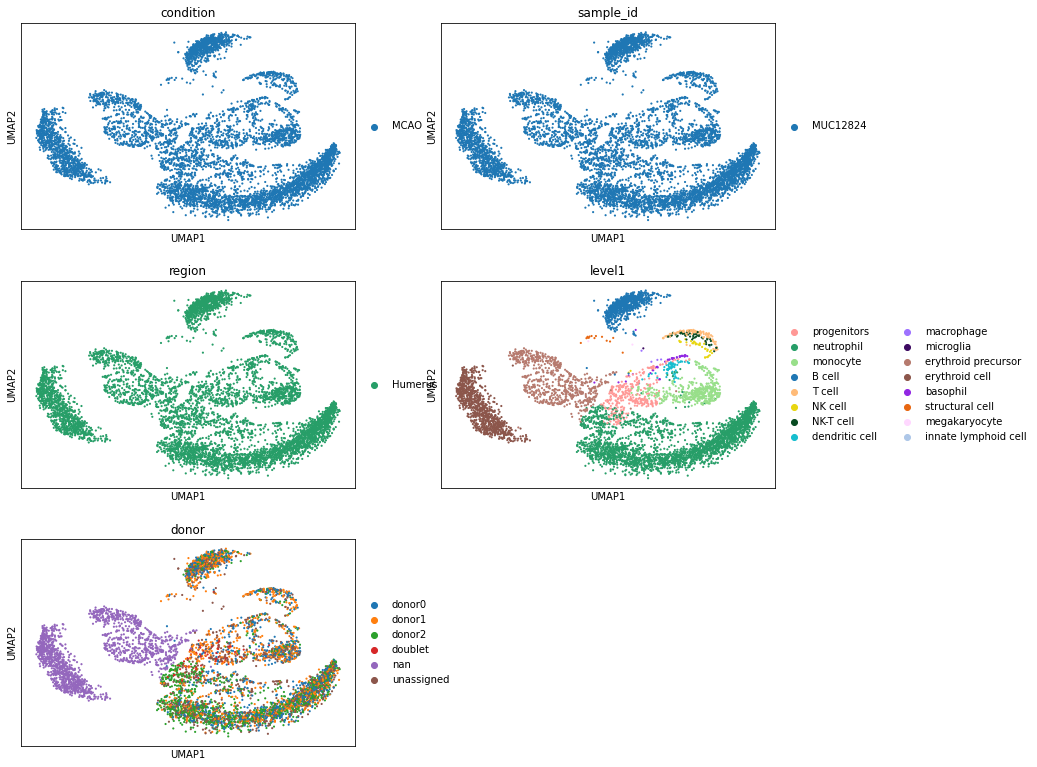

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12825          ###


donor0        1296
donor1         928
donor2         904
unassigned     674
doublet         67
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors               65      20      22       30          31
neutrophil               725     508     489       17         349
monocyte                 114      99      81       12         103
B cell                   263     221     229        2         105
T cell                    34      36      27        1          17
NK cell                   27      16      18        0           6
NK-T cell                 14      10      13        0           6
dendritic cell            35      12      12        4          17
macrophage                 3       0       1        0           5
microglia                  0       0       0        0           1
basophil                   7       4       6        1           4
structural cell            8       2       5        0          30
megakaryocyte              1       0       0        0           0
innate lymphoid cell       0       0       1        0           0

... storing 'donor' as categorical


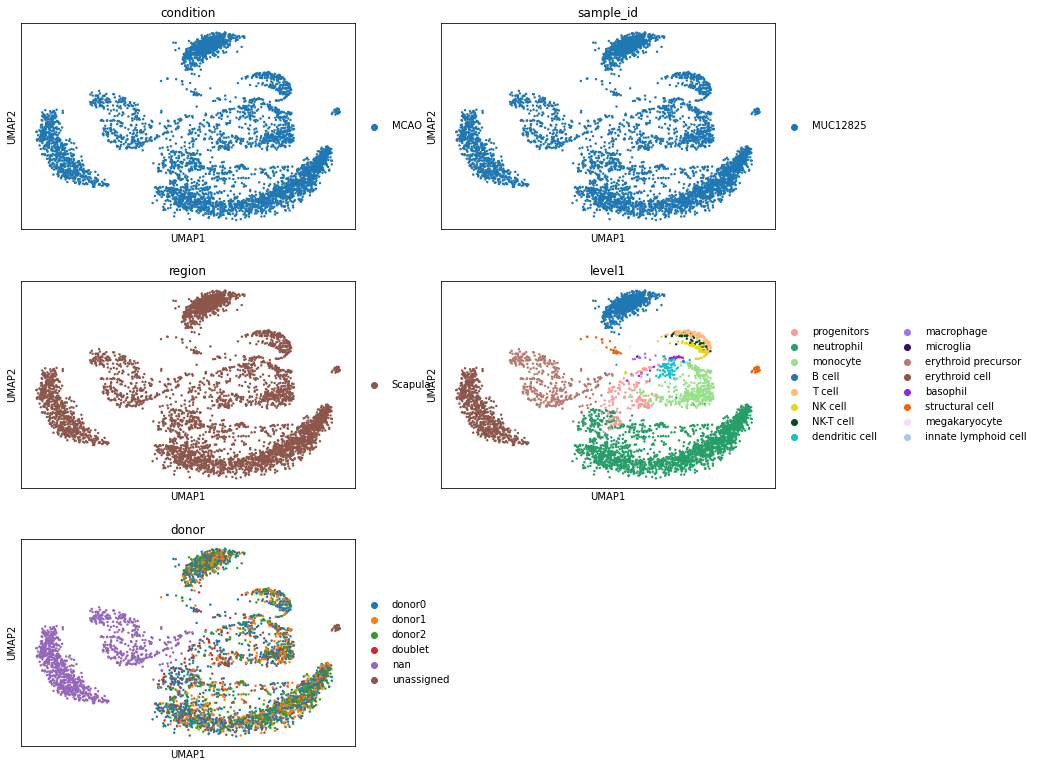

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12826          ###


donor1        510
unassigned    222
donor0        164
donor2        123
doublet        43
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors                0       0       0        2           1
neutrophil                 4       3       1        0           6
monocyte                   0       4       0        0           3
B cell                     1       2       0        0           1
T cell                     0       0       2        0           1
dendritic cell             1       1       0        0           3
macrophage                 4       5       6        6          10
microglia                 73     103      40       12          67
structural cell            0      12       4        1          22
brain cell                81     379      70       22         107
megakaryocyte              0       0       0        0           1
innate lymphoid cell       0       1       0        0           0

... storing 'donor' as categorical


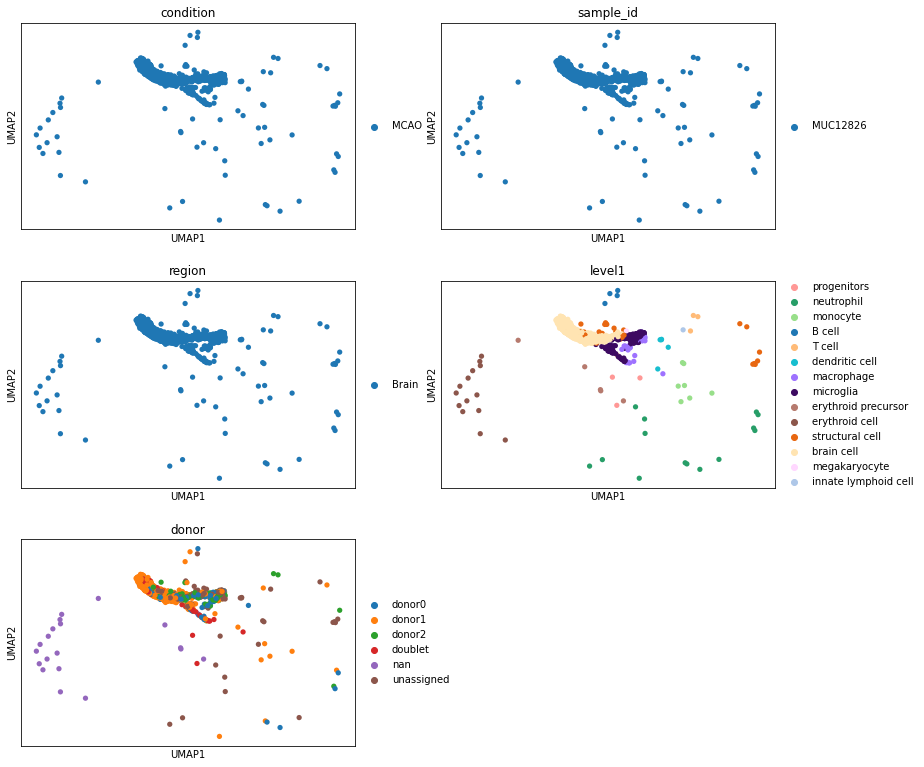

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12827          ###


donor1        998
donor2        857
donor0        609
unassigned    424
doublet        38
Name: donor, dtype: int64

donor            donor0  donor1  donor2  doublet  unassigned
level1                                                      
progenitors          14      37       5        8          11
neutrophil          311     478     454        9         240
monocyte             25      79      25        8          26
B cell              193     277     290        0          78
T cell               41      65      48        3          36
NK cell              13      25      15        1           5
NK-T cell             3      14       7        0           4
dendritic cell        7      17      11        8          12
macrophage            0       0       0        0           2
basophil              1       4       1        1           4
structural cell       1       1       1        0           6
megakaryocyte         0       1       0        0           0

... storing 'donor' as categorical


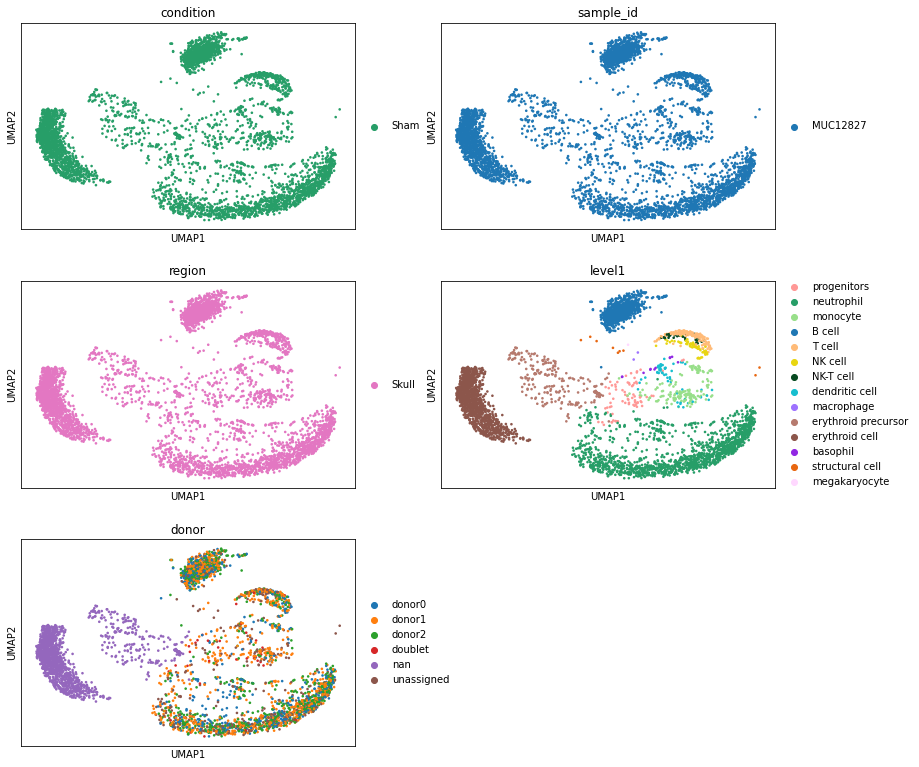

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12828          ###


donor0        1255
donor1        1033
donor2         849
unassigned     763
doublet        112
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors              113      38      32       51          45
neutrophil               695     520     529       25         429
monocyte                  99      99      56       28          72
B cell                   238     266     163        0          94
T cell                    32      45      27        0          38
NK cell                   15      15       7        1           5
NK-T cell                  9      11       7        0           4
dendritic cell            45      24      16        5          33
macrophage                 0       1       1        0           8
microglia                  0       0       0        0           1
basophil                   6      10       8        2          11
structural cell            3       2       2        0          22
brain cell                 0       0       1        0           1
innate lymphoid cell       0       2       0        0           0

... storing 'donor' as categorical


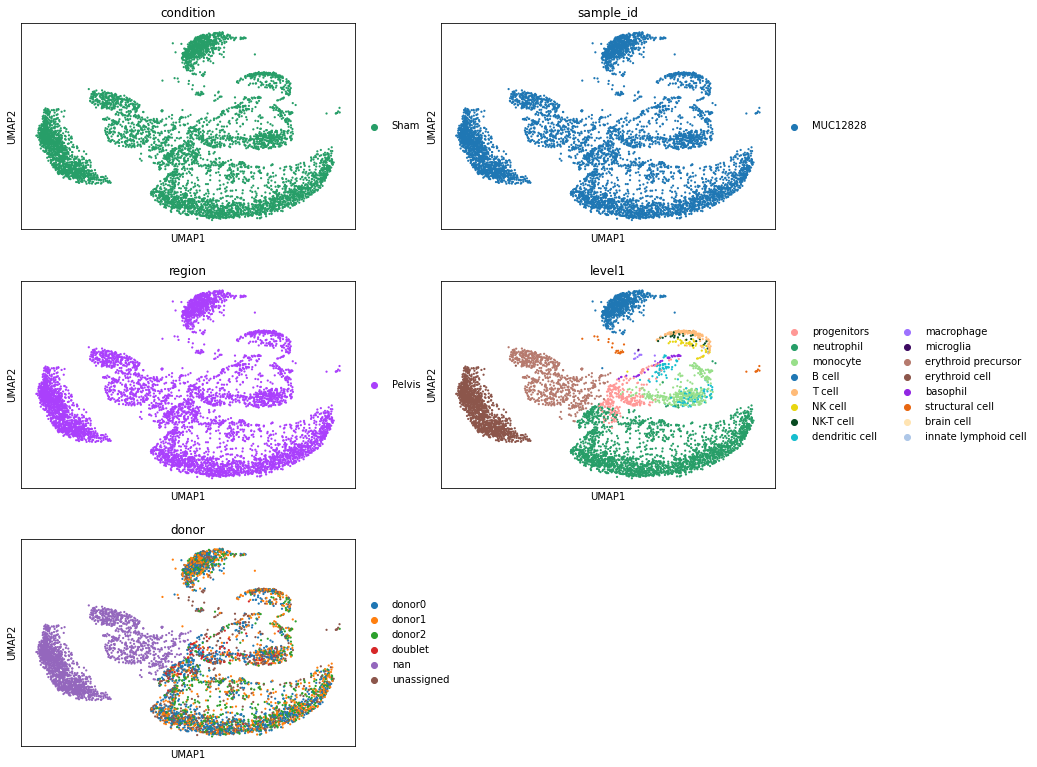

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12829          ###


donor2        1272
donor0         922
donor1         822
unassigned     640
doublet         62
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors               78      23      90       38          63
neutrophil               504     561     740       16         375
monocyte                 101      51      79        2          64
B cell                   146     123     238        2          69
T cell                    32      20      55        0          13
NK cell                   17       8       8        1           3
NK-T cell                  7       8      15        0           9
dendritic cell            29      22      29        2          22
macrophage                 1       0       0        0           4
basophil                   5       2      13        1           4
structural cell            2       4       4        0          13
innate lymphoid cell       0       0       1        0           1

... storing 'donor' as categorical


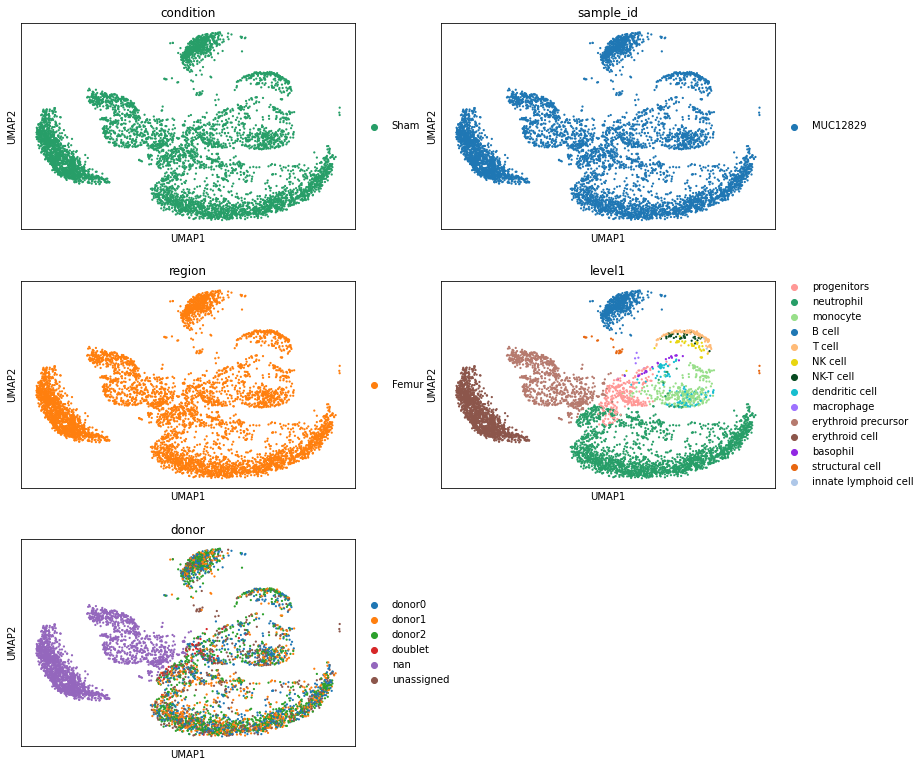

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


###          MUC12830          ###


donor2        306
unassigned    289
donor0        263
donor1        212
doublet        38
Name: donor, dtype: int64

donor                 donor0  donor1  donor2  doublet  unassigned
level1                                                           
progenitors                1       0       1        1          29
neutrophil                24       2       1        1          20
monocyte                   0       0       0        1           4
B cell                     5       2       1        1           2
T cell                     4       3       2        2           3
NK-T cell                  3       0       4        0           2
dendritic cell            16       2       3        4           4
macrophage                84      34      47        4          48
microglia                  2       1       1        0           6
structural cell          123     163     241       23         164
brain cell                 0       3       2        0           6
innate lymphoid cell       1       2       3        1           1

... storing 'donor' as categorical


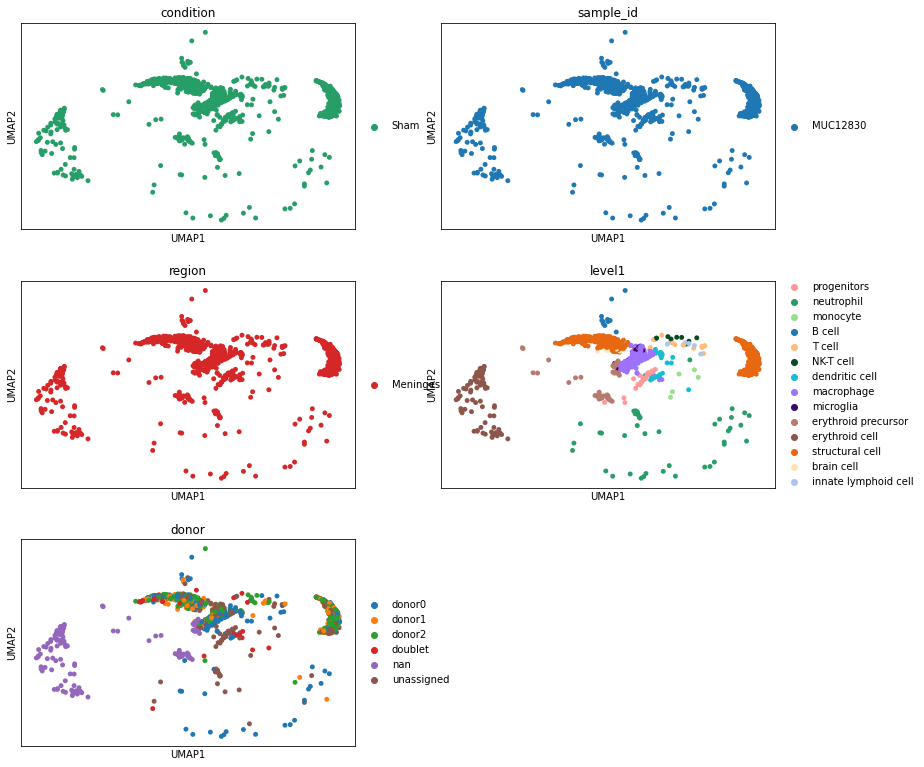

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Failed for MUC12831
Failed for MUC12832
Failed for MUC12833
Failed for MUC12834
Failed for MUC12835
Failed for MUC12836
Failed for MUC12837
Failed for MUC12838
Failed for MUC12839
Failed for MUC12840
Failed for MUC12841
Failed for MUC12842
Failed for MUC12843
Failed for MUC12844
Failed for MUC12845
Failed for MUC12846
Failed for MUC12847
Failed for MUC12848
Failed for MUC12849
Failed for MUC12850


In [6]:
for i,sample in enumerate(samples):
    try:
        a = adata[adata.obs["sample_id"]==sample].copy()
        df = pd.read_csv(f"/storage/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/donor_deconv/vireo_noeryt/{sample}/donor_ids.tsv", sep='\t')
        df.index = [idx+f"-{i}" for idx in df["cell"].values]
        a.obs["donor"] = df["donor_id"]
        print(f"###          {sample}          ###")
        display(a.obs["donor"].value_counts())
        display(pd.crosstab(a.obs["level1"],a.obs["donor"]))
        sc.pl.umap(a,color=["condition","sample_id","region","level1","donor"],ncols=2)
    except:
        print(f"Failed for {sample}")

In [23]:
a = adata[adata.obs["sample_id"]=="MUC12820"].copy()
df = pd.read_csv("/storage/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/donor_deconv/vireo/MUC12820/donor_ids.tsv", sep='\t')

/opt/python/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [24]:
df.index = [idx+"-1" for idx in df["cell"].values]

In [27]:
a.obs["donor"] = df["donor_id"]

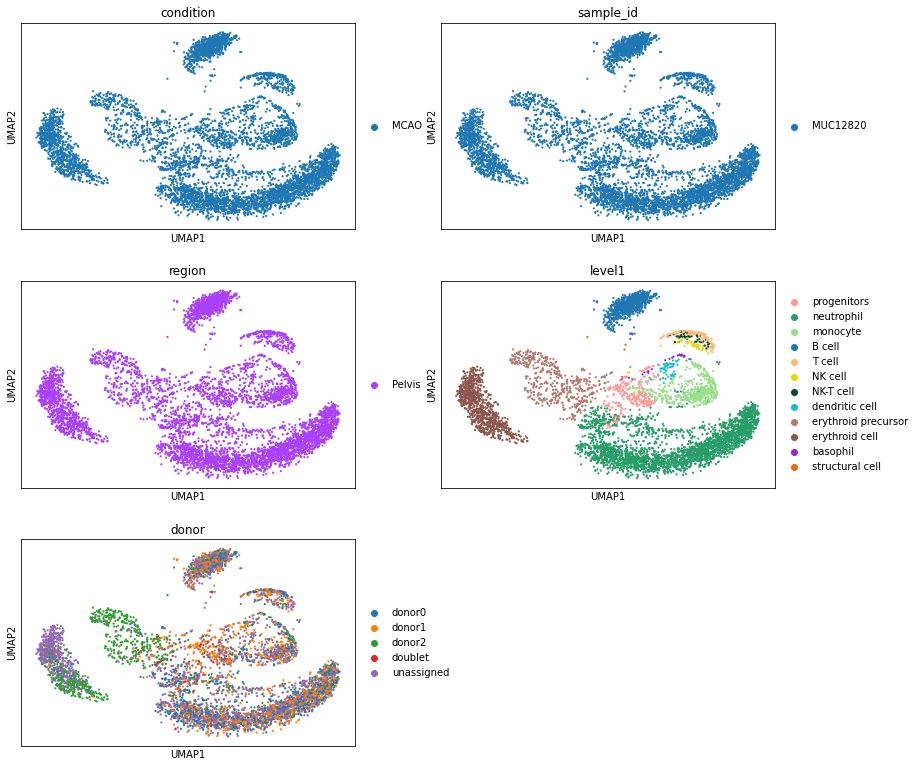

In [40]:
sc.pl.umap(a,color=["condition","sample_id","region","level1","donor"],ncols=2)

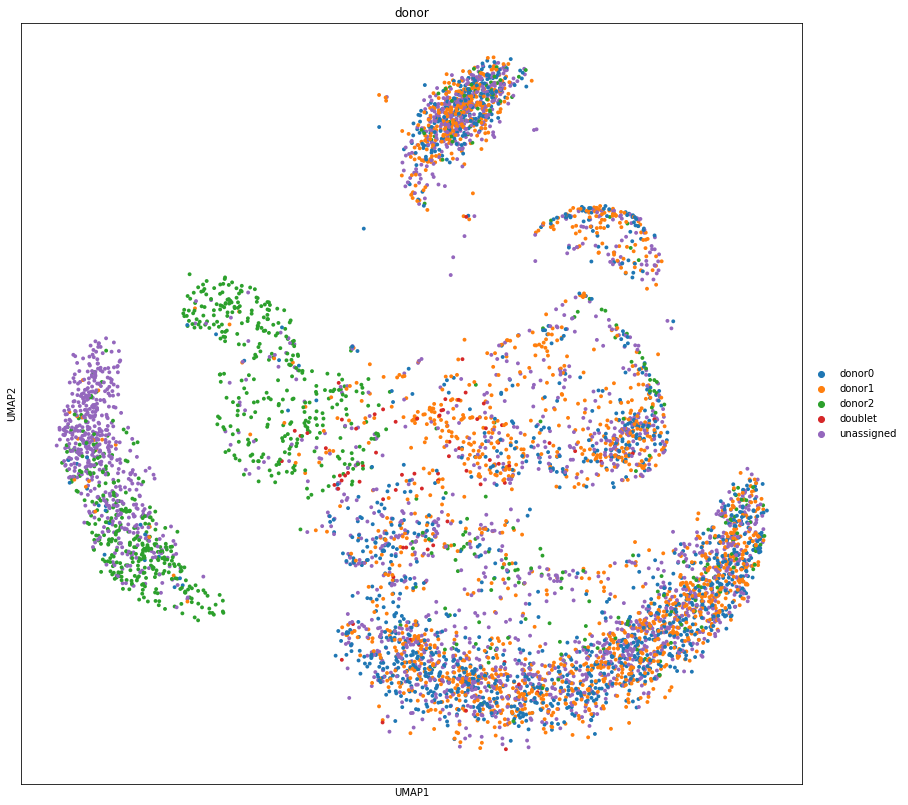

In [38]:
plt.figure(figsize=(14,14))
sc.pl.umap(a,color="donor",ax=plt.gca(),s=60)

In [34]:
a.obs["donor"].value_counts()

unassigned    2198
donor1        1749
donor0        1414
donor2         892
doublet         77
Name: donor, dtype: int64

In [36]:
pd.crosstab(a.obs["level1"],a.obs["donor"])

donor                donor0  donor1  donor2  doublet  unassigned
level1                                                          
progenitors              47     137       6       24          59
neutrophil              916     930     139       21         945
monocyte                132     193      23        8         162
B cell                  207     296      49        1         324
T cell                   34      57       3        0          36
NK cell                   9      16       0        1          18
NK-T cell                13      20       3        0          13
dendritic cell           11      26       3        0          16
erythroid precursor      22      43     338       22          85
erythroid cell           18      19     326        0         529
basophil                  4      12       2        0           9
structural cell           1       0       0        0           2